## Никонюк Марія, КН-413 варіант №6

# Завдання

Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати можливість суміщення цих зображень і з визначення параметрів геметричних перетворень (кут повороту, зміщень в напрямку х і напрямку y).

Варіант №6

6. SURF

Для перевірки збігів необхідно написати власну функцію матчінгу, а результати її роботи перевірити засобами OpenCV. Якщо повної реалізації дескриптора не має в OpenCV, то такий необхідно створити власну функцію побудови цих дискрипторів. У цьому випадку
матчінг можна здійснювати стандартними засобами (якщо це можливо).

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_cv_img(img_1, img_2):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax[0].imshow(img_1)
    ax[0].set_title('image 1')
    ax[1].imshow(img_2)
    ax[1].set_title('changed image 2')
    plt.show()

In [3]:
img1 = plt.imread('high_fl_1.jpg')
img2 = plt.imread('low_fl.jpg')
img3 = plt.imread('high_contrast.jpg')
img4 = plt.imread('low_contrast.jpg')

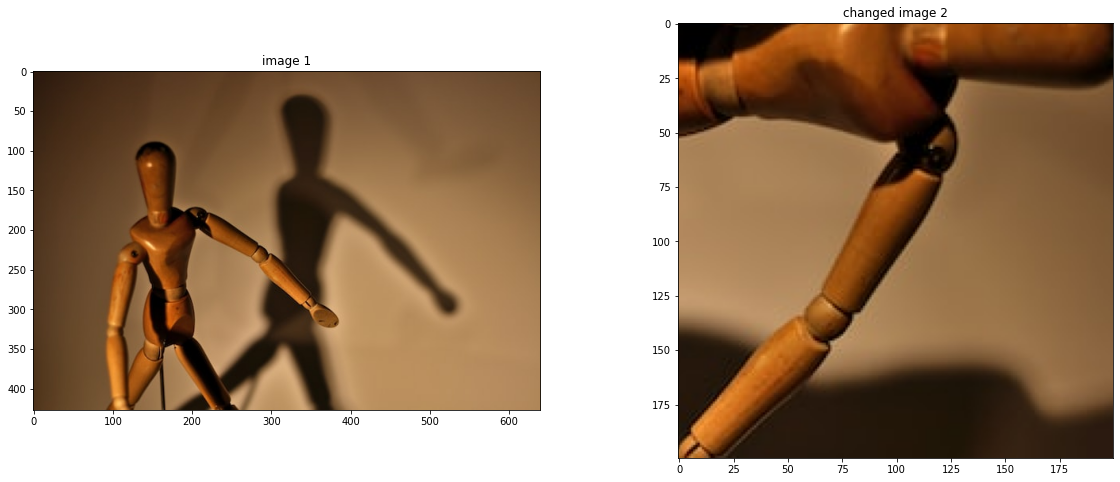

In [4]:
crop1 = img1[100:300, 150:350]
rot1 = cv2.rotate(crop1, cv2.ROTATE_90_CLOCKWISE)
plot_cv_img(img1, rot1)

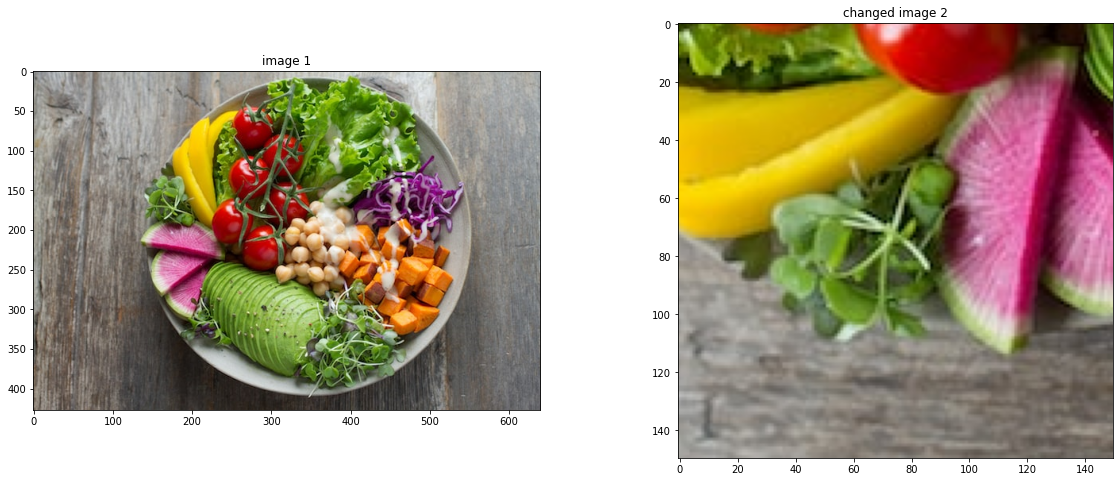

In [5]:
crop2 = img2[100:250, 100:250]
rot2 = cv2.rotate(crop2, cv2.ROTATE_90_COUNTERCLOCKWISE)
plot_cv_img(img2, rot2)

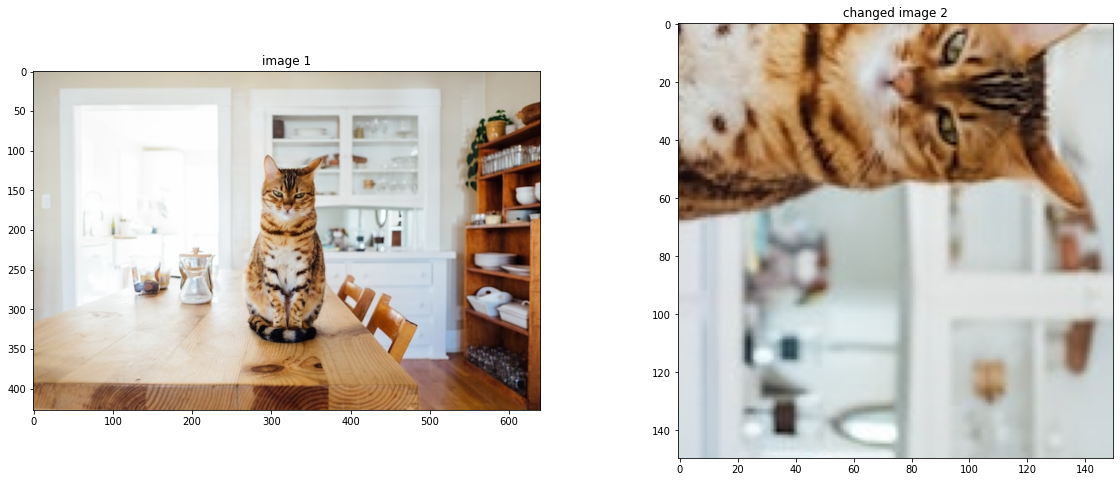

In [6]:
crop3 = img3[100:250, 300:450]
rot3 = cv2.rotate(crop3, cv2.ROTATE_90_CLOCKWISE)
plot_cv_img(img3, rot3)

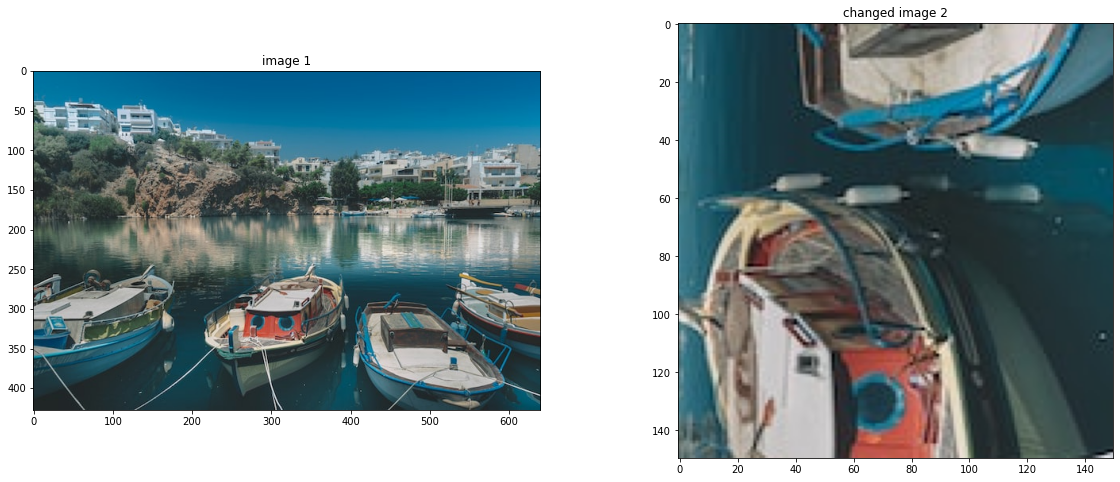

In [7]:
crop4 = img4[250:400, 300:450]
rot4 = cv2.rotate(crop4, cv2.ROTATE_90_COUNTERCLOCKWISE)
plot_cv_img(img4, rot4)

In [32]:
def surf_matcher_cv(image, query, matches_number):
    
    surf = cv2.xfeatures2d.SURF_create()
    
    kp1, des1 = surf.detectAndCompute(image, None)
    kp2, des2 = surf.detectAndCompute(query, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda sample: sample.distance)

    return cv2.drawMatches(image, kp1, query, kp2, matches[:matches_number], None, flags=2)

In [17]:
def my_matcher(des1, des2, matches_number):
    
    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            dist = np.linalg.norm(d1 - d2)
            match = cv2.DMatch(_queryIdx=i, _trainIdx=j, _distance=dist, _imgIdx=0)
            matches.append(match)
    matches = sorted(matches, key=lambda sample: sample.distance)
    return matches[:matches_number]

In [18]:
def surf_matcher_own(image, query, matches_number):
    
    surf = cv2.xfeatures2d.SURF_create()
    
    kp1, des1 = surf.detectAndCompute(image, None)
    kp2, des2 = surf.detectAndCompute(query, None)

    matches = my_matcher(des1, des2, matches_number)
   
    return cv2.drawMatches(image, kp1, query, kp2, matches, None, flags=2)

In [12]:
def show_image(image, type_func):
    plt.figure(figsize=(16, 10))
    if type_func == 0:
        plt.title("Вбудована функція матчінгу OpenCV")
    if type_func == 1:
        plt.title("Власна функція матчінгу")
    plt.imshow(image)

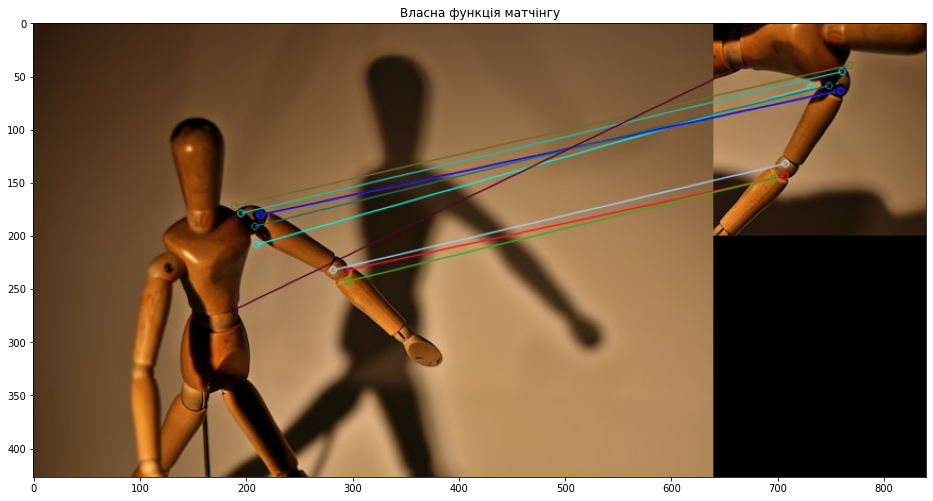

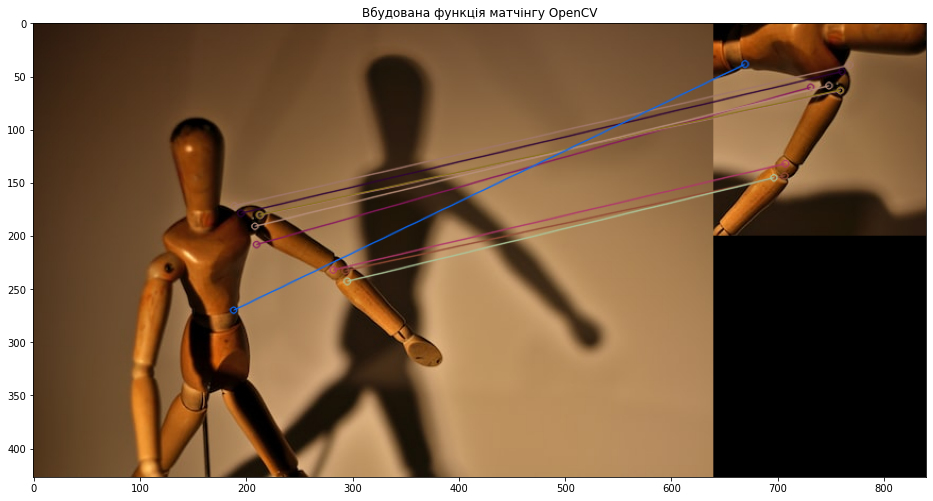

In [33]:
show_image(image=surf_matcher_own(image=img1, query=rot1, matches_number=10), type_func=1)
show_image(image=surf_matcher_cv(image=img1, query=rot1, matches_number=10), type_func=0)

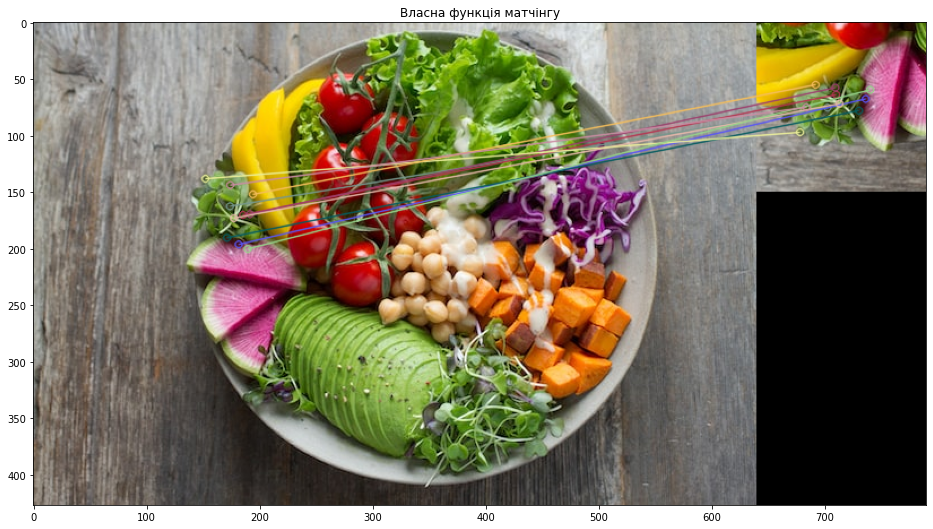

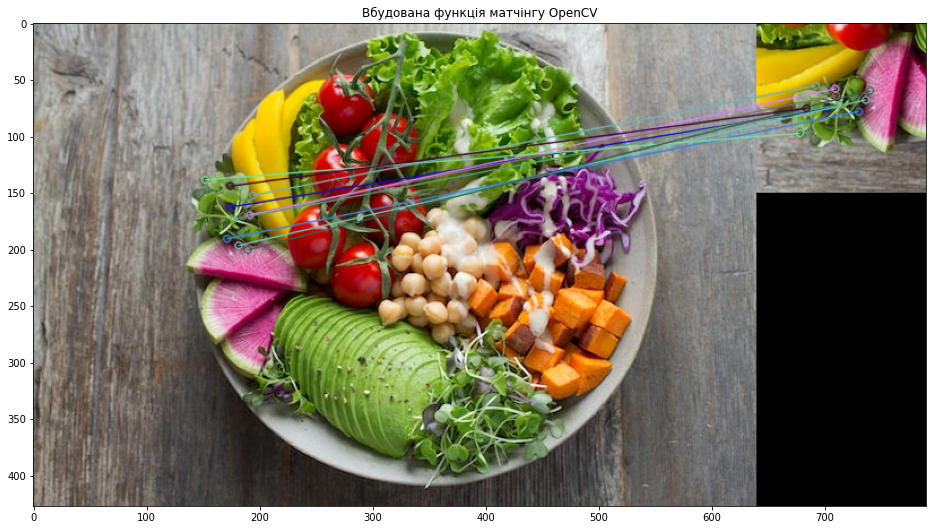

In [14]:
show_image(image=surf_matcher_own(image=img2, query=rot2, matches_number=10), type_func=1)
show_image(image=surf_matcher_cv(image=img2, query=rot2, matches_number=10), type_func=0)

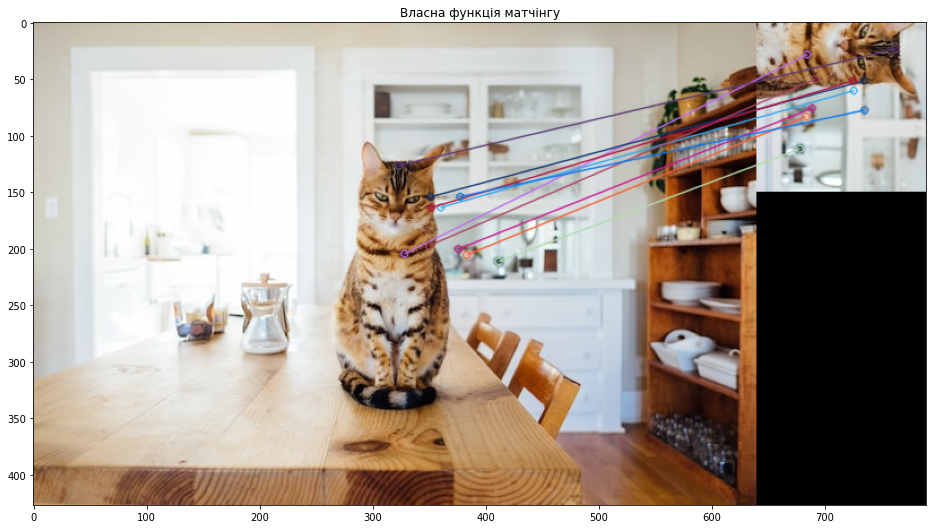

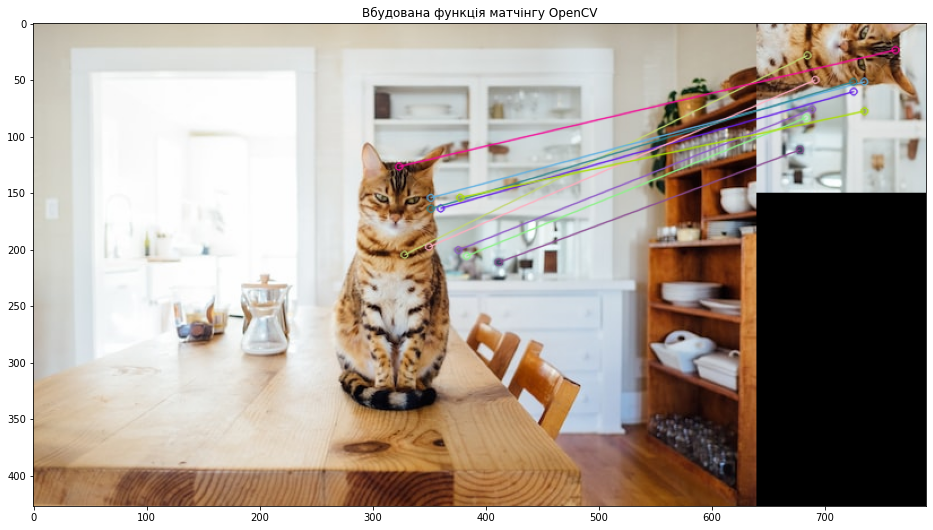

In [15]:
show_image(image=surf_matcher_own(image=img3, query=rot3, matches_number=10), type_func=1)
show_image(image=surf_matcher_cv(image=img3, query=rot3, matches_number=10), type_func=0)

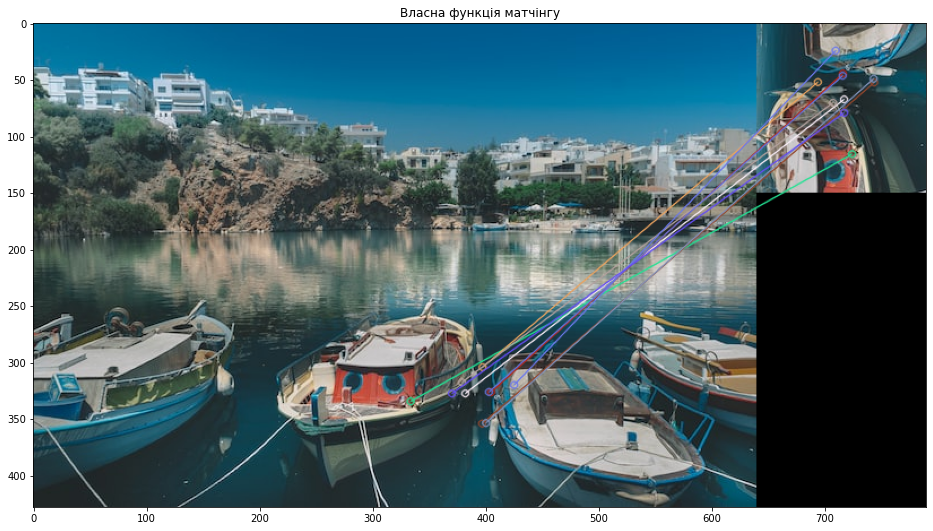

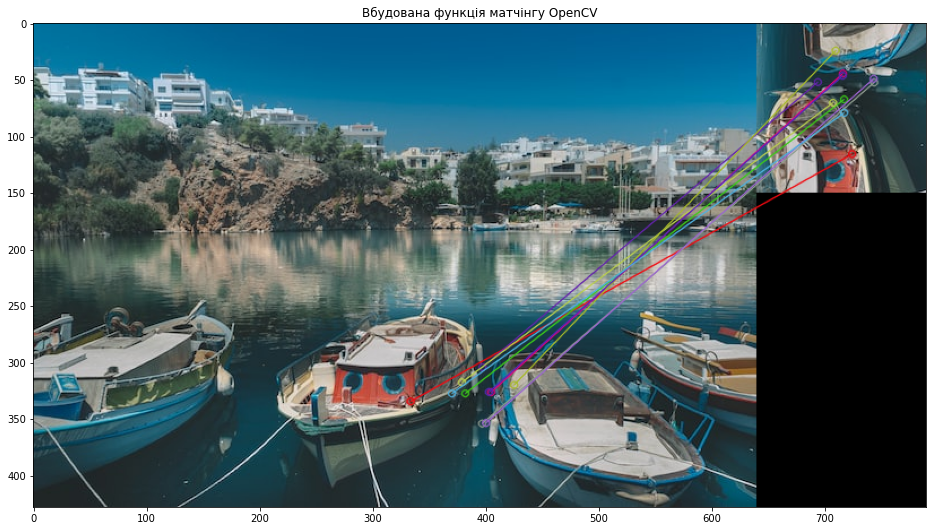

In [16]:
show_image(image=surf_matcher_own(image=img4, query=rot4, matches_number=10), type_func=1)
show_image(image=surf_matcher_cv(image=img4, query=rot4, matches_number=10), type_func=0)